<a href="https://colab.research.google.com/github/MrKamlakar/Data-Analysis-Portfolio-project/blob/main/Sales_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and analysis

In [2]:
#Data loading from csv format to to pandas data frame
big_mart_data=pd.read_csv("/content/Train.csv")
big_mart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [3]:
# First five rows of data
big_mart_data["Item_Identifier"].astype(str)


0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [4]:
big_mart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#no of data points and no of features
np.shape(big_mart_data)

(8523, 12)

In [6]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical features:

- Item_identifier
- Item_fat_content
- Item_type
- Outlet_Identifier
- Outlet_size
- outlet_location_type
-  Outlet_Type 

In [8]:
#checking for misiing value
big_mart_data.isnull().sum()
big_mart_data["Item_Identifier"].astype(str)

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [9]:
type(big_mart_data["Item_Identifier"])

pandas.core.series.Series

#handling missing value
mean=> average value
mode=> most repeated value

Mean=> average value

mode=> most repeated value

In [10]:
np.mean(big_mart_data["Item_Weight"])

12.857645184135976

#since our Item_weight feature is numeric we will fiil is using its mean value

In [11]:
big_mart_data["Item_Weight"].fillna(big_mart_data["Item_Weight"].mean(),inplace=True)

In [12]:
big_mart_data["Item_Weight"].isnull().sum()

0

#since our Outlet_size_size value categorical we will fill it using mode

In [13]:
Mode=big_mart_data["Outlet_Size"].mode()
Mode

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
big_mart_data["Outlet_Size"].isnull().sum()

2410

since the outlet_size and outlet_type are corelated we will find mode for each distinct value of outlet_size of outlet_type.

overall mode is not good precedure for filling misssing value

In [15]:
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_values = big_mart_data['Outlet_Size'].isnull()   
big_mart_data.loc[miss_values,'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])['Outlet_Size']

In [16]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [17]:
#statistical measures about data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [18]:
sns.set()

<ipython-input-19-07e442199352>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Weight"])


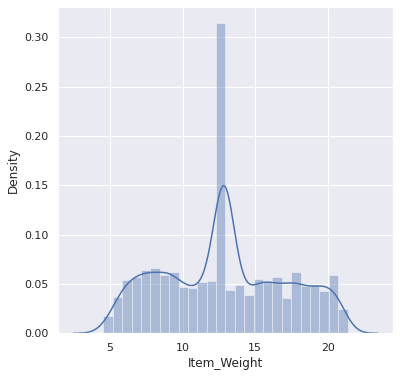

In [19]:
#Item_weight_distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Weight"])
plt.show()

<ipython-input-20-e0ca6eb926e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Visibility"])


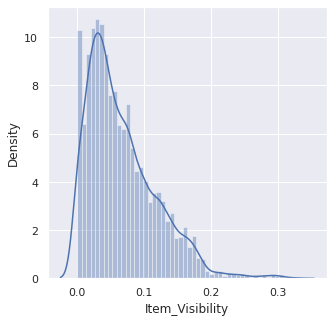

In [20]:
#Item visibility distribution
plt.figure(figsize=(5,5))
sns.distplot(big_mart_data["Item_Visibility"])
plt.show()

<ipython-input-21-4cc5c25475ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_MRP"])


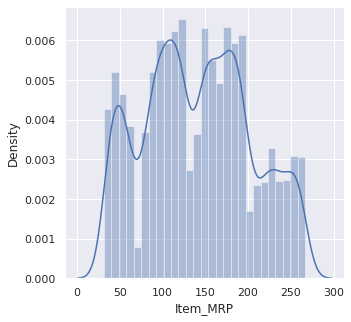

In [21]:
#Item MRP distribution
plt.figure(figsize=(5,5))
sns.distplot(big_mart_data["Item_MRP"])
plt.show()

<ipython-input-22-6f22eb304efa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Outlet_Sales"])


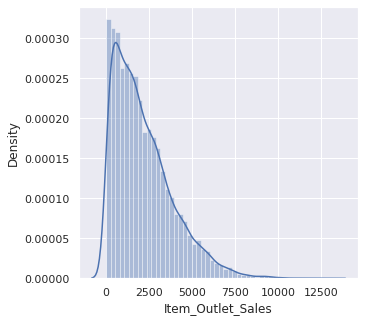

In [22]:
#Item Item_Outlet_Sales distribution
plt.figure(figsize=(5,5))
sns.distplot(big_mart_data["Item_Outlet_Sales"])
plt.show()

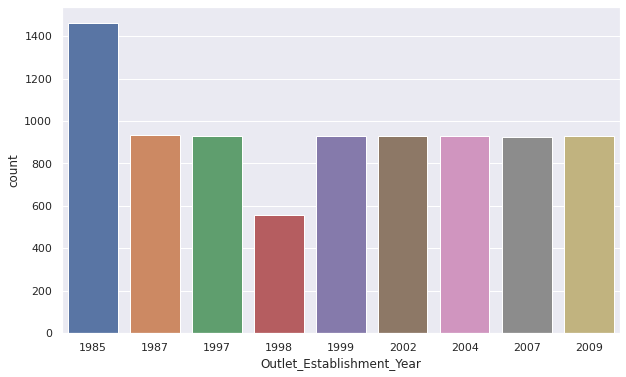

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Establishment_Year",data=big_mart_data)
plt.show()

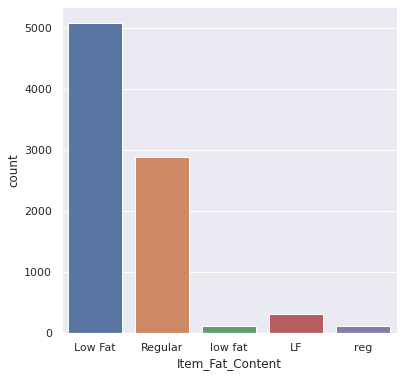

In [24]:
#  Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=big_mart_data)
plt.show()


we can see here 'Low Fat','low fat' and 'LF' are refering same thing so we have to clean that data.Similarly Regular and reg are same.

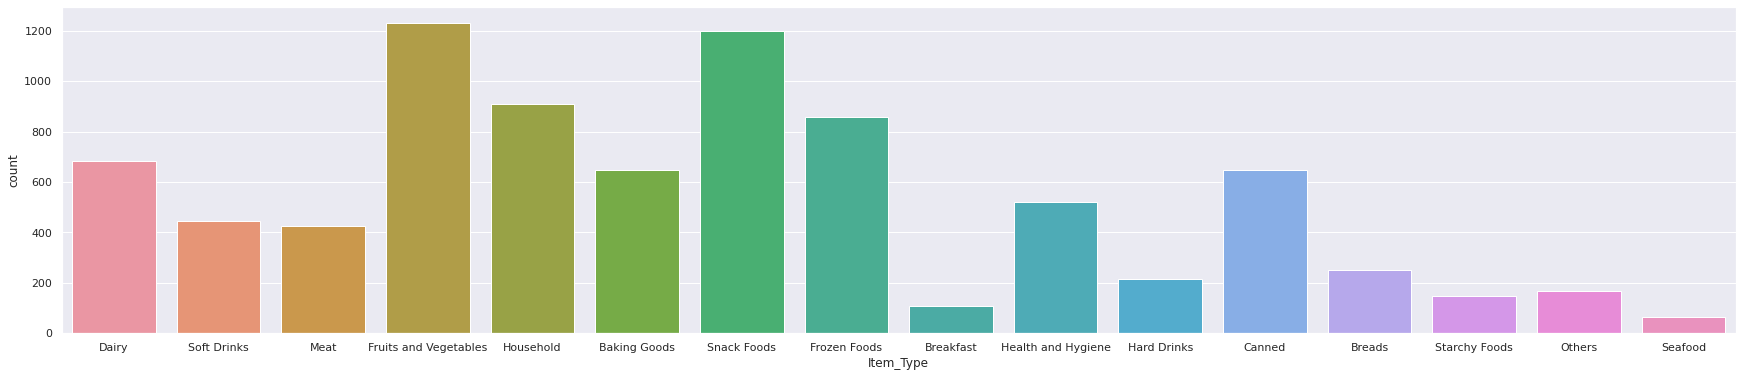

In [25]:
#Item_Type
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=big_mart_data)
plt.show()

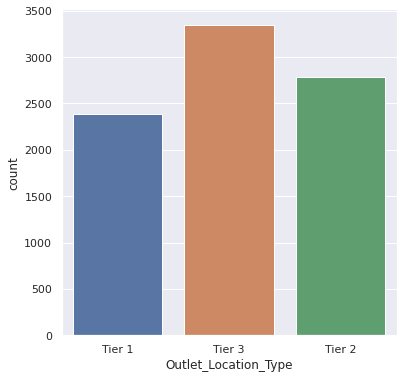

In [26]:
# Outlet_Location_Type
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type",data=big_mart_data)
plt.show()

Data preprocessing

In [27]:
big_mart_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
big_mart_data.replace({'Item_Fat_Content':{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)

In [29]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

LabelEncoing


In [30]:
encoder=LabelEncoder()

In [31]:
big_mart_data["Outlet_Size"]=encoder.fit_transform(big_mart_data["Outlet_Size"])

In [32]:
big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])


In [33]:

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [34]:
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

In [35]:
big_mart_data.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [36]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Splitting feature and target

In [37]:
x=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
y=big_mart_data["Item_Outlet_Sales"]

In [38]:
x.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [39]:
y.head(5)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

Splitting the data into training and test data

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=20)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5710, 11), (2813, 11), (5710,), (2813,))

Machine learning model Training

XGBoostRegressor

In [42]:
regressor=XGBRegressor()

In [43]:
regressor.fit(x_train,y_train)
predicted_sales=regressor.predict(x_test)
predicted_sales


3325     998.7000
3504    4122.6336
2244     149.8050
2783    2680.5108
3326    3478.8050
          ...    
7721    1155.8288
6053    2570.6538
7022    2073.3012
4543    5195.2374
1261    2681.8424
Name: Item_Outlet_Sales, Length: 2813, dtype: float64

In [45]:

df=pd.DataFrame(y_test)
x=df.rename(columns={'Item_Outlet_Sales':'Actual_sales'})
x


,Actual_sales
3325,998.7000
3504,4122.6336
2244,149.8050
2783,2680.5108
3326,3478.8050
...,...
7721,1155.8288
6053,2570.6538
7022,2073.3012
4543,5195.2374


In [47]:
df=x.assign(Predicted=predicted_sales)
df

,Actual_sales,Predicted
3325,998.7000,1882.083374
3504,4122.6336,4353.807129
2244,149.8050,638.669983
2783,2680.5108,1830.866211
3326,3478.8050,3629.591309
...,...,...
7721,1155.8288,511.664093
6053,2570.6538,3121.739746
7022,2073.3012,1776.647095
4543,5195.2374,3277.845459


In [51]:
# R squared value
r2_test=metrics.r2_score(y_test,predicted_sales)

In [52]:
print("r2 value is = ",r2_test)

r2 value is =  0.5283785981473965
